In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sqlite3
from sgtaxidata import *
from sklearn.linear_model import *
from sklearn.pipeline import *
from sklearn.preprocessing import *

DBNAME="../taxis.db"
LAT=1.380766
LON=103.891675
LAT1=1.303693
LON1=103.844952


In [2]:
df=taxis.getdf_loc_time(DBNAME,'0905',LAT1,LON1)
df.head()

,Point,Date,X,Y,TaxiCount
0,0,20170624,20,5,69
1,1,20170625,20,5,60
2,2,20170626,20,5,52
3,3,20170627,20,5,41
4,4,20170628,20,5,70


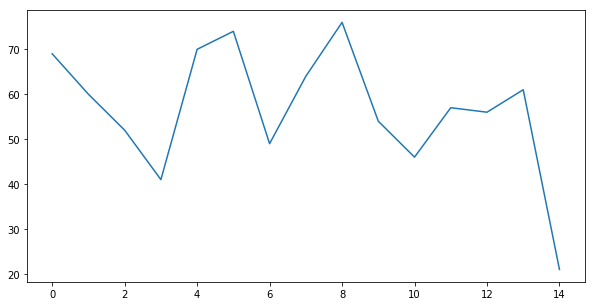

In [3]:
visualize.plot_data([(df['Point'].tolist(),df['TaxiCount'].tolist())])

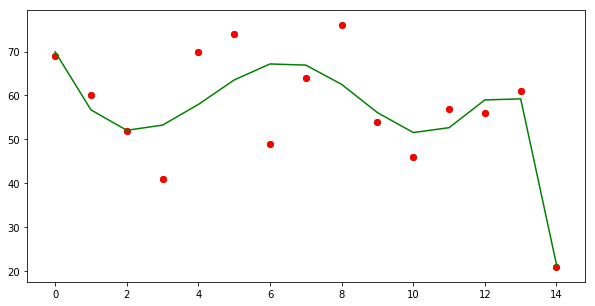

0.642683597417
[ 62.5231801]


,Point,Date,X,Y,TaxiCount
10,10,20170704,20,5,46
11,11,20170705,20,5,57
12,12,20170706,20,5,56
13,13,20170707,20,5,61
14,14,20170708,20,5,21


In [4]:
model=Pipeline([('ploy',PolynomialFeatures(degree=7,include_bias=True)),('ridge',Ridge(alpha=0,fit_intercept=False))])
X=df['Point'].as_matrix()
X=X.reshape(-1,1)
y=df['TaxiCount'].as_matrix()

model.fit(X,y)

visualize.plot_model(X,y,model)

print model.score(X,y)

X_predict = np.array([8]).reshape(-1,1)
print model.predict(X_predict)

df.tail()